In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [61]:
df = pd.read_csv("workspace_table.csv")
df = pd.read_csv("workspace_table.csv")
data = df.dropna()
print(data.duplicated().any())

data.describe()

False


,Unnamed: 0,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,537667.000000,5.376670e+05,537667.000000,537667.000000,5.376670e+05,537667.000000,537667.000000,537667.0,537667.000000,537667.000000,537667.000000,537667.000000
mean,324939.939448,5.079231e+06,-19.305241,0.506697,1.971171e+05,-15010.958999,-2762.029935,1.0,0.281615,0.298893,0.100730,2.303069
std,188426.565876,4.200200e+04,14.037827,0.787285,1.041390e+05,3416.418092,2393.919456,0.0,0.449787,0.457773,0.300971,0.936852
min,31.000000,5.008806e+06,-60.000000,0.000000,2.700000e+04,-24611.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,161021.500000,5.044925e+06,-29.000000,0.000000,1.350000e+05,-17594.000000,-3661.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,326285.000000,5.079091e+06,-17.000000,0.000000,1.800000e+05,-14785.000000,-2147.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,488309.500000,5.115755e+06,-8.000000,1.000000,2.295000e+05,-12239.000000,-1050.000000,1.0,1.000000,1.000000,0.000000,3.000000
max,649742.000000,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [22]:
#Jaki % klientów jest niewypłacalny? 
#Przyjmujemy, że niewypłacalny jest klient, który spóźnia się ze spłatą powyżej 3 miesięcy.

#Ilość klientów (unikalne ID)
print("Liczba zarejestrowanych transakcji: ", data["ID"].count())
print( "Ilość klientów banku: ", data["ID"].nunique())
loan = data[data["STATUS"]!= "X"]
clients_with_loan = loan["ID"].nunique()

print("Ilość klientów banku, mających pożyczkę: ", clients_with_loan)
insolvent3 = data[data["STATUS"]== "3"] # niewypłacalni w grupie 3
print("Ilość klientów niewypłacalnych w grupie 3 : ", len(insolvent3))
insolvent4 = data[data["STATUS"]== "4"] # niewypłacalni w grupie 4
print("Ilość klientów niewypłacalnych w grupie 4 : ", len(insolvent4))
insolvent5 = data[data["STATUS"]== "5"] # niewypłacalni w grupie 5
print("Ilość klientów niewypłacalnych w grupie 5 : ", len(insolvent5))

insolvent = len(insolvent3) + len(insolvent4) + len(insolvent5)
print("Łączna ilość klientów niewypłacalnych: ", insolvent)

insolvent_percentage = print("Procent niewypłacalnych klientów: ", 100*(insolvent/clients_with_loan))

#Procent niewypłacalnych klientów został przyjęty w taki sposób, że mimo zarejestrowanych ponad 500 tys. transakcji, 
#procent klientów liczymy od unikalnego ID, tj. przyjmujemy założenie, że jeśli dany klient choć raz trafił do
# grupy 3,4 lub 5, to uznany jest za niewypłacalnego.



Liczba zarejestrowanych transakcji:  537667
Ilość klientów banku:  25134
Ilość klientów banku, mających pożyczkę:  22737
Ilość klientów niewypłacalnych w grupie 3 :  181
Ilość klientów niewypłacalnych w grupie 4 :  152
Ilość klientów niewypłacalnych w grupie 5 :  1087
Łączna ilość klientów niewypłacalnych:  1420
Procent niewypłacalnych klientów:  6.245327000043981


C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Ilość klientów')

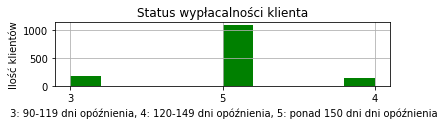

In [23]:
insol = loan[loan["STATUS"]!= "C"][loan["STATUS"]!= "X"][loan["STATUS"]!= "0"][loan["STATUS"]!= "1"][loan["STATUS"]!= "2"]
plt.subplot(3,1,1)
plt.title("Status wypłacalności klienta")
plt.hist(insol["STATUS"], facecolor='g')
plt.grid(True)
plt.xlabel(" 3: 90-119 dni opóźnienia, 4: 120-149 dni opóźnienia, 5: ponad 150 dni dni opóźnienia")
plt.ylabel("Ilość klientów")

In [39]:
# Jak rozkłada się niewypłacalność w danych źródłach przychodu?
type = insol[["NAME_INCOME_TYPE",  "ID"]].groupby(by=["NAME_INCOME_TYPE"]).count()
t1 = type["ID"]
all_type = loan[["NAME_INCOME_TYPE", "ID"]].groupby(by=["NAME_INCOME_TYPE"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(type["ID"])
print(all_type["ID"])
print(percent_type)

NAME_INCOME_TYPE
Commercial associate    585
Pensioner                29
State servant            61
Working                 745
Name: ID, dtype: int64
NAME_INCOME_TYPE
Commercial associate    122908
Pensioner                  320
State servant            42466
Student                    253
Working                 269553
Name: ID, dtype: int64
NAME_INCOME_TYPE
Commercial associate    0.475966
Pensioner               9.062500
State servant           0.143644
Student                      NaN
Working                 0.276383
Name: ID, dtype: float64


In [38]:
# Jak rozkłada się niewypłacalność w danych zakresach przychodu?
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
insol["BINS"] = pd.cut(insol["AMT_INCOME_TOTAL"], bins)
bin_grouped = insol.groupby(by= "BINS" ).count()

bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
loan["BINS_1"] = pd.cut(loan["AMT_INCOME_TOTAL"], bins)
bin_grouped_all = loan.groupby(by= "BINS_1" ).count()
bin_grouped_all["ID"]
t = 100* ( bin_grouped["ID"])/ bin_grouped_all["ID"]
print(bin_grouped["ID"])
print(bin_grouped_all["ID"])
print(t)
# WNIOSEK: W najniższych dochodach i w najwyższych jest procentowo najwyższa niewypłacalność, ale różnice nie są duże.
# Moja propozycja: Ranking - 3 pkt. za emeryta, 2 pkt. za commercial assosiate.

BINS
(0, 150000]           560
(150000, 185000]      262
(185000, 200000]       26
(200000, 225000]      233
(225000, 10000000]    339
Name: ID, dtype: int64
BINS_1
(0, 150000]           162999
(150000, 185000]       88883
(185000, 200000]        4694
(200000, 225000]       71204
(225000, 10000000]    107720
Name: ID, dtype: int64
BINS
(0, 150000]           0.343560
(150000, 185000]      0.294770
(185000, 200000]      0.553899
(200000, 225000]      0.327229
(225000, 10000000]    0.314705
Name: ID, dtype: float64


In [40]:
# Jak rozkłada się niewypłacalność względem poziomu wykształcenia?
type = insol[["NAME_EDUCATION_TYPE",  "ID"]].groupby(by=["NAME_EDUCATION_TYPE"]).count()
t1 = type["ID"]
all_type = loan[["NAME_EDUCATION_TYPE", "ID"]].groupby(by=["NAME_EDUCATION_TYPE"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(type["ID"])
print(all_type["ID"])
print(percent_type)

# WNIOSEK: W najniższych dochodach i w najwyższych jest procentowo najwyższa niewypłacalność, ale różnice nie są duże.
# Moja propozycja: Ranking - 2 pkt. za wykształcenie podstawowe

NAME_EDUCATION_TYPE
Higher education                 487
Incomplete higher                 50
Lower secondary                   44
Secondary / secondary special    839
Name: ID, dtype: int64
NAME_EDUCATION_TYPE
Academic degree                     322
Higher education                 122388
Incomplete higher                 16869
Lower secondary                    3570
Secondary / secondary special    292351
Name: ID, dtype: int64
NAME_EDUCATION_TYPE
Academic degree                       NaN
Higher education                 0.397915
Incomplete higher                0.296402
Lower secondary                  1.232493
Secondary / secondary special    0.286984
Name: ID, dtype: float64


In [42]:
# Jak rozkłada się niewypłacalność względem statusu rodzinnego?
type = insol[["NAME_FAMILY_STATUS",  "ID"]].groupby(by=["NAME_FAMILY_STATUS"]).count()
t1 = type["ID"]
all_type = loan[["NAME_FAMILY_STATUS", "ID"]].groupby(by=["NAME_FAMILY_STATUS"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(type["ID"])
print(all_type["ID"])
print(percent_type)

# WNIOSEK: Największą grupę stanowią żonaci i single, a wśród nich częściej niewypłacalni są single. 
# Moja propozycja: Ranking - 1 pkt. za singla/wdowca

NAME_FAMILY_STATUS
Civil marriage            20
Married                 1015
Separated                 57
Single / not married     277
Widow                     51
Name: ID, dtype: int64
NAME_FAMILY_STATUS
Civil marriage           35903
Married                 309883
Separated                25325
Single / not married     54598
Widow                     9791
Name: ID, dtype: int64
NAME_FAMILY_STATUS
Civil marriage          0.055706
Married                 0.327543
Separated               0.225074
Single / not married    0.507345
Widow                   0.520887
Name: ID, dtype: float64


In [43]:
# Jak rozkłada się niewypłacalność względem wielkości rodziny?
type = insol[["CNT_FAM_MEMBERS",  "ID"]].groupby(by=["CNT_FAM_MEMBERS"]).count()
t1 = type["ID"]
all_type = loan[["CNT_FAM_MEMBERS", "ID"]].groupby(by=["CNT_FAM_MEMBERS"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(type["ID"])
print(all_type["ID"])
print(percent_type)

# WNIOSEK: Najwięcej jest rodzin dwuosobowych i jednocześnie najczęściej są one wypłacalne 
#(możemy założyć najczęstszy model dwóch dorosłych pracujących)
# Moja propozycja: Ranking - 2 pkt. za 3 os. rodzinę 

CNT_FAM_MEMBERS
1.0    233
2.0    692
3.0    379
4.0    102
5.0     10
6.0      4
Name: ID, dtype: int64
CNT_FAM_MEMBERS
1.0      69524
2.0     226430
3.0      87651
4.0      45593
5.0       5331
6.0        722
7.0        110
9.0         46
15.0        87
20.0         6
Name: ID, dtype: int64
CNT_FAM_MEMBERS
1.0     0.335136
2.0     0.305613
3.0     0.432397
4.0     0.223719
5.0     0.187582
6.0     0.554017
7.0          NaN
9.0          NaN
15.0         NaN
20.0         NaN
Name: ID, dtype: float64


In [44]:
# Jak rozkłada się niewypłacalność względem ilości dzieci?
type = insol[["CNT_CHILDREN",  "ID"]].groupby(by=["CNT_CHILDREN"]).count()
t1 = type["ID"]
all_type = loan[["CNT_CHILDREN", "ID"]].groupby(by=["CNT_CHILDREN"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(type["ID"])
print(all_type["ID"])
print(percent_type)

# WNIOSEK: Zbieżne z powyższymi. Najwięcej jest rodzin dwuosobowych i jednocześnie najczęściej są one wypłacalne 
#(możemy założyć najczęstszy model dwóch dorosłych pracujących)
# Moja propozycja: Ranking - 2 pkt. za 3 os. rodzinę 

CNT_CHILDREN
0    840
1    464
2    102
3     10
4      4
Name: ID, dtype: int64
CNT_CHILDREN
0     278591
1     102573
2      47950
3       5363
4        774
5        110
7         46
14        87
19         6
Name: ID, dtype: int64
CNT_CHILDREN
0     0.301517
1     0.452361
2     0.212722
3     0.186463
4     0.516796
5          NaN
7          NaN
14         NaN
19         NaN
Name: ID, dtype: float64


In [56]:
# Jak rozkłada się niewypłacalność w danych grupach wiekowych?
bins = pd.IntervalIndex.from_tuples([(-7300, 0), (-10950, -7300), (-14600, -10950), (-18250, -14600), (-21900, -18250), (-25550,-21900)])
insol["BINS"] = pd.cut(insol["DAYS_BIRTH"], bins)
bin_grouped = insol.groupby(by= "BINS" ).count()

bins = pd.IntervalIndex.from_tuples([(-7300, 0), (-10950, -7300), (-14600, -10950), (-18250, -14600), (-21900, -18250), (-25550,-21900)])
loan["BINS_1"] = pd.cut(loan["DAYS_BIRTH"], bins)
bin_grouped_all = loan.groupby(by= "BINS_1" ).count()
bin_grouped_all["ID"]
t = 100* ( bin_grouped["ID"])/ bin_grouped_all["ID"]
print(bin_grouped["ID"])
print(bin_grouped_all["ID"])
print(t)

#Wnioski: Najwięcej jest kredytobiorców w grupie wiekowej 30-40 i 40-50, a najwięcej niewypłacalnych
# jest w grupie 50-60 lat i w grupie najmłodszej 20-30 lat. Najlepiej spłaca grupa 30-40 lat.
# Moja propozycja - 2 pkt. za wiek powyżej 50 lat oraz za wiek poniżej 30 lat. 

BINS
(-7300, 0]            0
(-10950, -7300]     215
(-14600, -10950]    295
(-18250, -14600]    467
(-21900, -18250]    443
(-25550, -21900]      0
Name: ID, dtype: int64
BINS_1
(-7300, 0]               0
(-10950, -7300]      58832
(-14600, -10950]    147231
(-18250, -14600]    140503
(-21900, -18250]     79018
(-25550, -21900]      9916
Name: ID, dtype: int64
BINS
(-7300, 0]               NaN
(-10950, -7300]     0.365447
(-14600, -10950]    0.200365
(-18250, -14600]    0.332377
(-21900, -18250]    0.560632
(-25550, -21900]    0.000000
Name: ID, dtype: float64
